In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools
import math_functions as mf


In [2]:
######## Constants ########

A_sample = 1 # Fraction of light absorbed by sample
frac_PSII = 1 # Fraction of light absorbed by PSII
k_F = 1 # Rate constant for fluorescence
k_H = 1 # Rate constant for heat dissipation
k_P = 1 # Rate constant for photochemistry

I_k = 100 # Exponetial saturation constant for photochemistry
offset_fact = 3 # fraction of I_k 
amplitude_fact = 0.25 # fraction of I_k

frequency = 1 # Frequency of light modulation in Hz

nb_periods = 4 # Number of periods to simulate
points_per_period = 100 # Number of points per period

In [3]:
######## Functions ########

t = np.linspace(0, nb_periods/frequency, nb_periods * points_per_period) # Time vector
I = offset_fact * I_k + amplitude_fact * I_k * np.sin(2 * np.pi * frequency * t) # Irradiance vector
P = np.exp(- I / I_k) # Probability of photochemistry (fraction of open PSII centers)
phi_F = k_F/(k_F + k_H + k_P * P) # Fluorescence quantum yield
F = A_sample * frac_PSII * phi_F * I # Fluorescence vector 

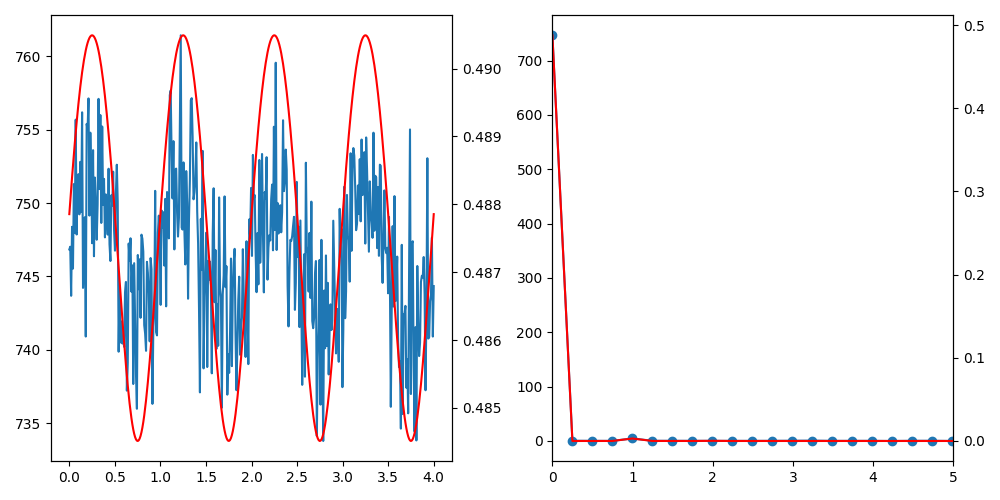

In [4]:
I2 = I + np.random.normal(0, 0.005*I_k*offset_fact, len(I))
I2 = I2/1531
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t, F/I2)
ax2 = ax[0].twinx()
ax2.plot(t, phi_F, 'r')
F_fft, A_fft, P_fft = tools.FFT(t, F/I2)
ax[1].plot(F_fft, A_fft, 'o-')
F_fft, A_fft, P_fft = tools.FFT(t, phi_F)
ax3 = ax[1].twinx()
ax3.plot(F_fft, A_fft, 'r')
ax[1].set_xlim(0, 5* frequency)

fig.tight_layout()

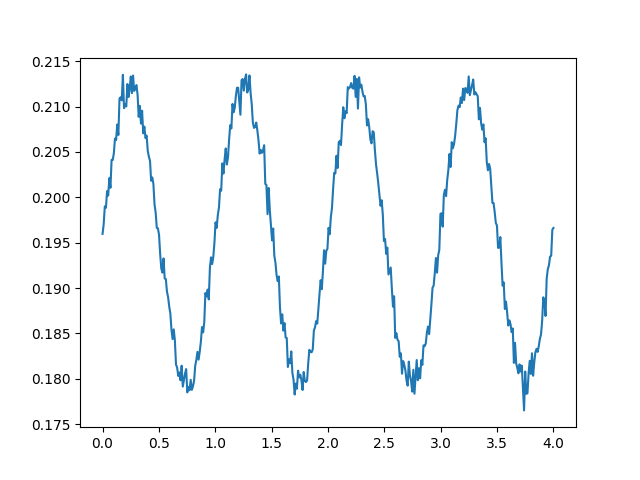

In [5]:
fig, ax = plt.subplots()
ax.plot(t, I2)

In [6]:
######## Constants ########

A_sample = 1 # Fraction of light absorbed by sample
frac_PSII = 1 # Fraction of light absorbed by PSII
k_F = 0.125 # Rate constant for fluorescence
k_H = 0.125 # Rate constant for heat dissipation
k_P = 1 # Rate constant for photochemistry

I_k = 100 # Exponetial saturation constant for photochemistry
I_PS = 20*I_k # Intensity of saturating pulse

In [7]:
######## Functions ########

I = np.linspace(0, 25*I_k, 1000) # Irradiance vector
P = np.exp(- I / I_k) # Probability of photochemistry (fraction of open PSII centers)
phi_F_I = k_F/(k_F + k_H + k_P * P) # Fluorescence quantum yield
phi_F_PS = k_F/(k_F + k_H + k_P * (np.exp(- I_PS / I_k))) # Fluorescence quantum yield with saturating pulse
phi_F_0 = k_F/(k_F + k_H + k_P) # Fluorescence quantum yield at I=0
phi_PSII = (k_P * P)/(k_F + k_H + k_P * P) # PSII quantum yield


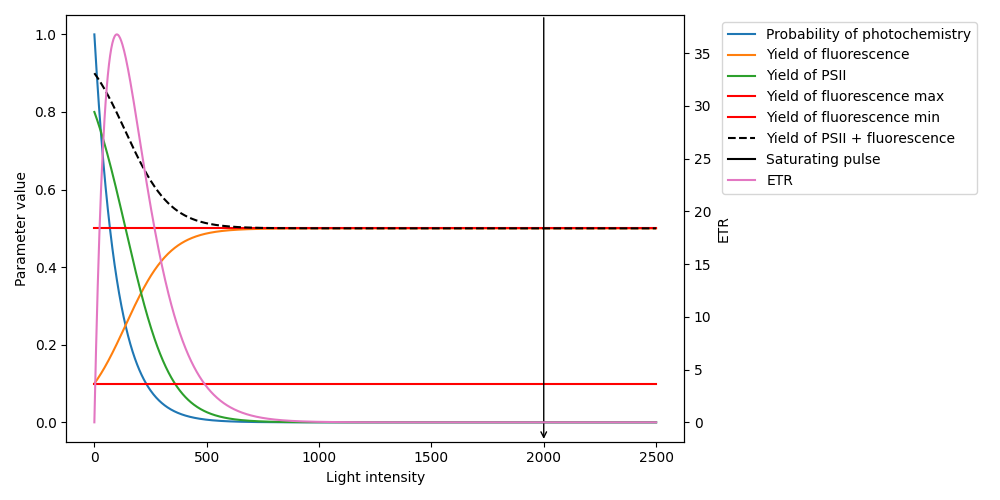

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(I, P, label = "Probability of photochemistry")
ax.plot(I, phi_F_I, label = "Yield of fluorescence")
ax.plot(I, phi_PSII, label = "Yield of PSII")
ax.plot([I[0], I[-1]], [phi_F_PS, phi_F_PS], 'r', label = "Yield of fluorescence max")
ax.plot([I[0], I[-1]], [phi_F_0, phi_F_0], 'r', label = "Yield of fluorescence min")
ax.plot(I, np.asarray(phi_F_I) + np.asarray(phi_PSII), '--' , label = "Yield of PSII + fluorescence", color = 'k')
ax.annotate("", xy=(I_PS, ax.get_ylim()[0]), xytext=(I_PS, ax.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="k", linewidth = 1))
ax.plot([], [], 'k', label = 'Saturating pulse')
ax.plot([], [], 'C6', label = 'ETR')
ax2 = ax.twinx()
ax2.plot(I, P * I, color = 'C6')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Light intensity')
ax2.set_ylabel('ETR')
ax.set_ylabel('Parameter value')
fig.tight_layout()

C:\Users\Orlando\AppData\Local\Temp\ipykernel_15956\2960330674.py:13: RuntimeWarning: invalid value encountered in true_divide
  phi_PSII = ETR / I # PSII quantum yield


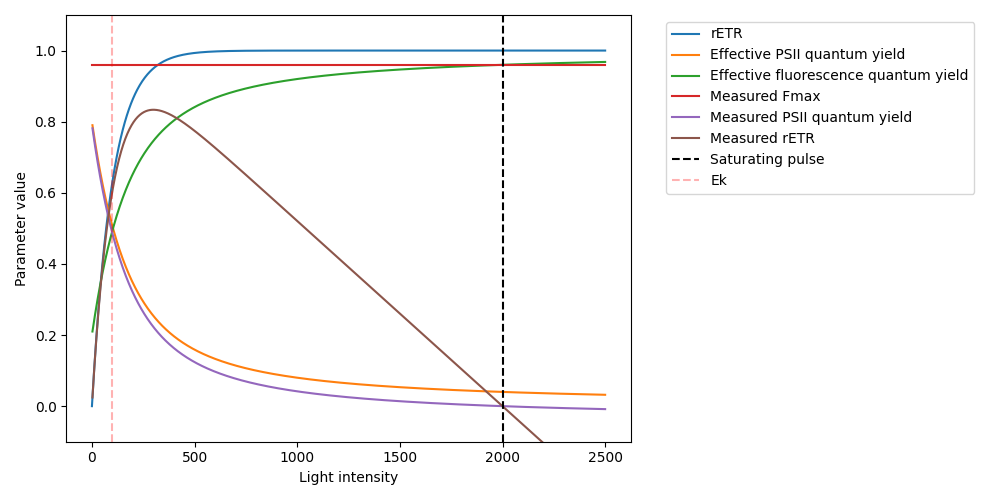

In [9]:
### Constants ###
Ek = 100 # Exponetial saturation constant for photochemistry
ETR_max = 80 # Maximum electron transport rate
PS_factor = 20 # Saturating pulse factor
I_PS = PS_factor * Ek # Intensity of saturating pulse
F_max = 1 # Maximum fluorescence yield



### Variables ###
I = np.linspace(0, 25*Ek, 1000) # Irradiance vector
ETR = ETR_max * (1 - np.exp(-I/Ek)) # Electron transport rate
phi_PSII = ETR / I # PSII quantum yield
phi_F = 1 - phi_PSII # Fluorescence quantum yield
F_0 = phi_F[1]*np.ones(len(I)) # Fluorescence yield at I=0

measured_Fmax = (1 - (ETR_max * (1 - np.exp(-I_PS/Ek))) / I_PS) * np.ones_like(I) # Measured Fmax
measured_phi_PSII = 1 - phi_F/measured_Fmax
measured_ETR = measured_phi_PSII*I


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(I, ETR/ETR_max, label = "rETR")
ax.plot(I, phi_PSII, label = "Effective PSII quantum yield")
ax.plot(I, phi_F, label = "Effective fluorescence quantum yield")
ax.plot(I, measured_Fmax, label = "Measured Fmax")
ax.plot(I, measured_phi_PSII, label = "Measured PSII quantum yield")
ax.plot(I, measured_ETR/ETR_max, label = "Measured rETR")
ax.axvline(I_PS, color = 'k', linestyle = '--', label = 'Saturating pulse')
ax.axvline(Ek, color = 'r', linestyle = '--', label = 'Ek', alpha = 0.3)



ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Light intensity')
ax.set_ylabel('Parameter value')
ax.set_ylim(-0.1, 1.1)
fig.tight_layout()

In [10]:
np.argmax(measured_ETR[1:])

119

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Constants
Ek = 100  # Exponential saturation constant for photochemistry
ETR_max = 80  # Maximum electron transport rate
PS_factor = 1  # Saturating pulse factor
F_max = 1  # Maximum fluorescence yield


# Function to update the plot based on slider values
def update_plot(Ek_val, ETR_max_val, PS_factor_log_val, xaxis_max_val):
    PS_factor_val = 10 ** PS_factor_log_val
    I = np.linspace(0, (PS_factor_val + 5) * Ek_val, 10000)[1:]  # Irradiance vector
    I_PS_val = PS_factor_val * Ek_val
    ETR = ETR_max_val * (1 - np.exp(-I / Ek_val))
    phi_PSII = ETR / I
    phi_F = 1 - phi_PSII
    measured_Fmax = (1 - (ETR_max_val * (1 - np.exp(-I_PS_val / Ek_val))) / I_PS_val) * np.ones_like(I)
    measured_phi_PSII = 1 - phi_F / measured_Fmax
    measured_ETR = measured_phi_PSII * I
    index = np.argmax(measured_ETR)
    
    popt, pcov, xfit, yfit = tools.Ek_fit(I[0:index], measured_ETR[0:index], 0, I[index], 50, p0 = [ETR_max_val, Ek_val])
    Ek_measure = popt[1]     
    
    Ek_error = (Ek_measure - Ek_val)/Ek_val * 100

    fig, ax = plt.subplots(figsize=(15, 7))
    ax.plot(I, ETR / ETR_max_val, label="rETR")
    ax.plot(I, phi_PSII, label="Effective PSII quantum yield")
    ax.plot(I, phi_F, label="Effective fluorescence quantum yield")
    ax.plot(I, measured_Fmax, label="Measured Fmax")
    ax.plot(I, np.ones_like(I), 'r:', label="Effective Fmax")
    ax.plot(I, measured_phi_PSII, label="Measured PSII quantum yield")
    ax.plot(I, measured_ETR / ETR_max_val, label="Measured rETR")
    ax.axvline(I_PS_val, color='k', linestyle='--', label='Saturating pulse')
    ax.axvline(Ek_val, color='k', linestyle='--', label='Ek', alpha=0.3)
    ax.axvline(Ek_measure, color='r', linestyle='--', label='Ek measured', alpha=0.3)
    ax.set_title(f'PS_factor: {PS_factor_val:.2f}, Ek error: {Ek_error:.2f}%')
    

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    ax.set_xlabel('Light intensity')
    ax.set_ylabel('Parameter value')
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, xaxis_max_val)
    fig.tight_layout()

# Create sliders for each constant
Ek_slider = FloatSlider(value=Ek, min=1, max=500, step=1, description='Ek')
ETR_max_slider = FloatSlider(value=ETR_max, min=1, max=1000, step=1, description='ETR_max')
PS_factor_slider = FloatSlider(value=PS_factor, min=-4, max=4, step=0.001, description='PS_exp_factor')
xaxis_max_slider = FloatSlider(value= Ek * (PS_factor + 5), min=1, max=10000, step=1, description='xaxis_max')

# Create interactive plot
interact(update_plot, Ek_val=Ek_slider, ETR_max_val=ETR_max_slider, PS_factor_log_val=PS_factor_slider, xaxis_max_val=xaxis_max_slider)



interactive(children=(FloatSlider(value=100.0, description='Ek', max=500.0, min=1.0, step=1.0), FloatSlider(va…

<function __main__.update_plot(Ek_val, ETR_max_val, PS_factor_log_val, xaxis_max_val)>

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Constants
ETR_max = 80  # Maximum electron transport rate
PS = 5000
PS_factor = 1  # Saturating pulse factor
F_max = 1  # Maximum fluorescence yield


# Function to update the plot based on slider values
def update_plot(ETR_max_val, PS_factor_exp_val, xaxis_max_val):
    PS_factor_val = 10 ** PS_factor_exp_val
    Ek_val = PS/PS_factor_val
    I = np.linspace(0, (PS_factor_val + 5) * Ek_val, 10000)[1:]  # Irradiance vector
    I_PS_val = PS_factor_val * Ek_val
    ETR = ETR_max_val * (1 - np.exp(-I / Ek_val))
    phi_PSII = ETR / I
    phi_F = 1 - phi_PSII
    measured_Fmax = (1 - (ETR_max_val * (1 - np.exp(-I_PS_val / Ek_val))) / I_PS_val) * np.ones_like(I)
    measured_phi_PSII = 1 - phi_F / measured_Fmax
    measured_ETR = measured_phi_PSII * I
    index = np.argmax(measured_ETR)
    
    popt, pcov, xfit, yfit = tools.Ek_fit(I[0:index], measured_ETR[0:index], 0, I[index], 50, p0 = [ETR_max_val, Ek_val])
    Ek_measure = popt[1]     
    
    Ek_error = (Ek_measure - Ek_val)/Ek_val * 100

    fig, ax = plt.subplots(figsize=(15, 7))
    ax.plot(I, ETR / ETR_max_val, label="rETR")
    ax.plot(I, phi_PSII, label="Effective PSII quantum yield")
    ax.plot(I, phi_F, label="Effective fluorescence quantum yield")
    ax.plot(I, measured_Fmax, label="Measured Fmax")
    ax.plot(I, np.ones_like(I), 'r:', label="Effective Fmax")
    ax.plot(I, measured_phi_PSII, label="Measured PSII quantum yield")
    ax.plot(I, measured_ETR / max(measured_ETR), label="Measured rETR")
    ax.axvline(I_PS_val, color='k', linestyle='--', label='Saturating pulse')
    ax.axvline(Ek_val, color='k', linestyle='--', label='Ek', alpha=0.3)
    ax.axvline(Ek_measure, color='r', linestyle='--', label='Ek measured', alpha=0.3)
    ax.set_title(f'PS_factor: {PS_factor_val:.2f},Ek: {Ek_val:.2f}, Ek error: {Ek_error:.2f}%')
    

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    ax.set_xlabel('Light intensity')
    ax.set_ylabel('Parameter value')
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(0, xaxis_max_val)
    fig.tight_layout()

# Create sliders for each constant
ETR_max_slider = FloatSlider(value=ETR_max, min=1, max=1000, step=1, description='ETR_max')
PS_factor_slider = FloatSlider(value=PS_factor, min=-3, max=3, step=0.001, description='PS_exp_factor')
xaxis_max_slider = FloatSlider(value= Ek * (PS_factor + 5), min=1, max=10000, step=1, description='xaxis_max')

# Create interactive plot
interact(update_plot, ETR_max_val=ETR_max_slider, PS_factor_exp_val=PS_factor_slider, xaxis_max_val=xaxis_max_slider)

# Show the plot
plt.show()

interactive(children=(FloatSlider(value=80.0, description='ETR_max', max=1000.0, min=1.0, step=1.0), FloatSlid…